In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import freqcol_0_6 as fc

import msise2Netcdf as msise
import irinetcdf_02 as iri
import pyigrf_clara_0_6 as igrf

import conductivity0_9_5 as cond

In [2]:
def calc_pRelativa(rhoi,ne):
    """
    Calcula a densidade numérica relativa da espécie ionica. Brekke (1993).
    
    Parameters
    ----------
    rhoi : PANDA SERIES FLOAT
        densidade do íon [m^-3]     
    ne : PANDA SERIES FLOAT
        Densidade de elétrons [elétrons/m^3]
    
    Returns:
    ----------
    pi : PANDA SERIES FLOAT
        densidade numérica relativa (Brekke,1983)
        
    """    
    pi = rhoi/ne        
    return pi


#### Hall

In [4]:
def calc_Hall(fen,fin1,fin2,wi1,wi2,we,p1,p2,ne,B):
        """
        CALCULA A CONDUTIVIDADE DE HALL APARTIR DAS EQUAÇÕES DE Adachi et al.
        Earth, Planets and Space (2017).

        Parameters
        ----------
        fen : PANDA SERIES
            frequência de colisão dos elétrons com as partículas neutras [Hz].
        fin1 : PANDA SERIES
            frequência de colisão do íon 1 com as partículas neutras [Hz].
        fin2 : PANDA SERIES
            frequência de colisão do íon 2 com as partículas neutras [Hz].
        wi1 : PANDA SERIES
            girofrequência do íon 1 [Hz].
        wi2 : PANDA SERIES
            girofrequência do íon 2 [Hz].
        we : PANDA SERIES
            girofrequência do elétron [Hz].
        p1 : TYPE
            DESCRIPTION.
        p2 : TYPE
            DESCRIPTION.
        ne : TYPE
            densidade de elétrons em [m^-3].
        B : TYPE
            intensidade do campo magnético da Terra [T].

        Returns
        -------
        self.condH : TYPE
            DESCRIPTION.

        """         
        print("\nCalculando a Condutividade de Hall...")
        e = -1.602177e-19 #Carga do elétron [C]
        d = 0
        soma = 0
        
        a1 = wi2**2/(wi2**2 + fin2**2)
        b1 = (wi1**2)/(wi1**2 + fin1**2)
        c1 = (we**2)/(we**2 + fen**2)

        soma = c1 - (p1 * b1) - (p2 * a1)
        d = (ne * np.sqrt(e**2))/B

        CondH  = d * soma
        print("Done")
        #return soma
        return CondH

#### Pedersen

In [6]:
def calc_Pedersen(fen,fin1,fin2,wi1,wi2,we,p1,p2,ne,B):
        """
        CALCULA A CONDUTIVIDADE DE PEDERSEN APARTIR DAS EQUAÇÕES DE Adachi et al.
        Earth, Planets and Space (2017).

        Parameters
        ----------
        fen : PANDA SERIES
            frequência de colisão dos elétrons com as partículas neutras [Hz].
        fin1 : PANDA SERIES
            frequência de colisão do íon 1 com as partículas neutras [Hz].
        fin2 : PANDA SERIES
            frequência de colisão do íon O+ com as partículas neutras [Hz].
        wi1 : PANDA SERIES
            girofrequencia do íon 1 [Hz].
        wi2 : TYPE
            girofrequência do íon O+ [Hz].
        we : TYPE
            DESCRIPTION.
        p1 : TYPE
            DESCRIPTION.
        p2 : TYPE
            DESCRIPTION.
        ne : TYPE
            DESCRIPTION.
        B : TYPE
            DESCRIPTION.

        Returns
        -------
        self.CondP : TYPE
            DESCRIPTION.

        """
        e = -1.602177e-19 #Carga do elétron [C]
        d = 0
        soma = 0
        
        print("===== Calculando a condutividade de Pedersen =====")
        
        a1 = (wi2 * fin2)/(wi2**2 + fin2**2)
        b1 = (wi1 * fin1)/(wi1**2 + fin1**2)
        c1 = (we * fen)/(we**2 + fen**2)
            
        soma = c1 + p1*b1 + p2*a1
        d = (ne * np.sqrt(e**2))/B
        
        CondP = d * soma
        
        print('Done')
        #return CondP
        return soma

## Constantes

In [8]:
me = 9.109389e-31 #Massa do elétron em repouso [kg]
e = -1.602177e-19 #Carga do elétron [C]
mi1 = 5.065e-26 #Massa do íon 1 uma mistura de NO+ (75%) e O2+ (25%) (30.5 u.m.a.) [kg]
mi2 = 2.657e-26 #Massa do íon 2 (O+) [kg] (16 a.m.u)

In [9]:
time = '0 days 06:00:00'

In [10]:
#help(fc.freqcol)

## Programa começa

### Lendo dados

#### IRI

In [14]:
namefileiri = "IRI.3D.2008001.nc"
iriteste = iri.irincdf(namefileiri)

In [15]:
iriteste.iridata.data.columns.to_list()

['Ne', 'Tn', 'Ti', 'Te', 'O+', 'H+', 'He+', 'O2+', 'NO+', 'N+']

In [16]:
iriteste.iridata.munit['H+']

{'long_name': 'Atomic_Hydrogen_ion_density', 'units': '/m^3'}

#### IRI 2D

In [18]:
namefileiri = "IRI.2D.2008001.nc"
iriteste2 = iri.irincdf(namefileiri)

In [19]:
O  = iriteste.iridata.data["O+"].loc[time]
NO = iriteste.iridata.data["NO+"].loc[time]
ne = iriteste.iridata.data["Ne"].loc[time]
O2 = iriteste.iridata.data["O2+"].loc[time]

In [20]:
#O.loc[140,-50]/ne.loc[140,-50]

In [21]:
iriteste2.iridata.munit

{'TEC': {'long_name': 'TEC', 'units': 'TECU'},
 'NmF2': {'long_name': 'NmF2', 'units': '/m^3'},
 'HmF2': {'long_name': 'HmF2', 'units': 'km'}}

In [22]:
#O.index.unique('lon')

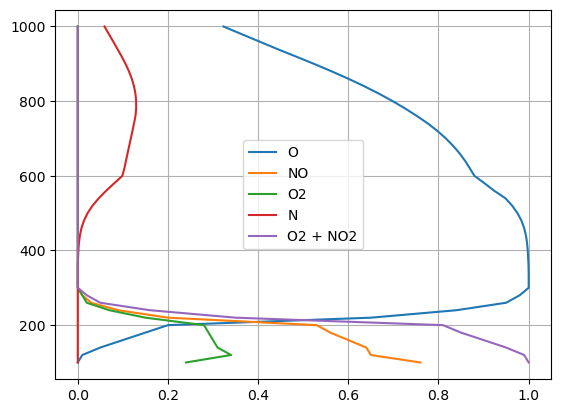

In [23]:
#O.loc[:,-50,60]/ne.loc[:,-50,60],NO.loc[:,-50,60]/ne.loc[:,-50,60],O2.loc[:,-50,60]/ne.loc[:,-50,60]

#composição da atmosfera

plt.plot(O.loc[:,-50,150]/ne.loc[:,-50,150],O.index.get_level_values('ht').unique(),label='O')
plt.plot(NO.loc[:,-50,150]/ne.loc[:,-50,150],NO.index.get_level_values('ht').unique(),label='NO')
plt.plot(O2.loc[:,-50,150]/ne.loc[:,-50,150],O2.index.get_level_values('ht').unique(),label='O2')
plt.plot(iriteste.iridata.data["N+"].loc[time,:,-50,150]/ne.loc[:,-50,150],O2.index.get_level_values('ht').unique(),label='N')

plt.plot((O2.loc[:,-50,150] + NO.loc[:,-50,150])/ne.loc[:,-50,150], O2.index.get_level_values('ht').unique(), label='O2 + NO2')

plt.legend()
plt.grid()

#### IGRF

In [25]:
#resIGRF = "igrf2008_global" #result from a previous run of pyigrf
resIGRF = "teste2024"
dado = igrf.IGRF(-80,-180,100,2008,resIGRF + '_2') #preciso garantir que estão nas mesmas coordenadas

#calcigrf = dado.calc_grid(intervalo_h = 20, lim_h = 500, intervalo_lat=10, lim_lat=90, intervalo_lon=20, lim_lon=180)
calcigrf = dado.get_grid(resIGRF + '_2' + "_grid.csv")

# print(calcigrf["B(T)"],
#       calcigrf["Altitude"],
#       calcigrf["Latitude"],
#       calcigrf["Longitude"])

dado.Dfgrid['Longitude'] = 180 + dado.Dfgrid['Longitude'] #so it will be from 0 to 360 instead
dado.Dfgrid = dado.going_to_multiindex(dado.Dfgrid)
dado.Dfgrid.index.names = ['ht','lat','lon'] #putting the same index names as the rest of the data to allow join operations

print("\nFeito\n")


Feito



In [26]:
calcigrf

Unnamed: 0  Altitude  Latitude  Longitude    Year  Declination  \
0              0     100.0     -80.0        0.0  2008.0   130.650016   
20            20     100.0     -80.0       20.0  2008.0   106.832854   
40            40     100.0     -80.0       40.0  2008.0    87.026928   
60            60     100.0     -80.0       60.0  2008.0    69.730176   
80            80     100.0     -80.0       80.0  2008.0    53.741100   
...          ...       ...       ...        ...     ...          ...   
6039        6039     480.0      80.0      260.0  2008.0    26.928769   
6059        6059     480.0      80.0      280.0  2008.0    17.599779   
6079        6079     480.0      80.0      300.0  2008.0     2.255246   
6099        6099     480.0      80.0      320.0  2008.0    -3.066547   
6119        6119     480.0      80.0      340.0  2008.0     1.817205   

      Inclination  Horizontal_intensity  Total_intensity  North_component  \
0      -78.987166          11153.322641     58385.533834     -7265.684471   
20     -77.322789          12548.832156     57180.974298     -3633.899525   
40     -75.185835          14180.630634     55461.381823       735.501253   
60     -72.863350          15728.937435     53381.467651      5449.158841   
80     -70.617133          16968.620205     51128.926759     10035.834357   
...           ...                   ...              ...              ...   
6039    85.899230           3363.957000     47041.207223      2999.203974   
6059    86.719411           2714.139287     47428.592018      2587.095402   
6079    86.684425           2749.034163     47532.032913      2746.904865   
6099    86.030108           3281.614189     47400.070928      3276.915161   
6119    85.456473           3737.070596     47175.450076      3735.191160   

      East_component  Vertical_component  DeclinationSV  InclinationSV  \
0        8462.058561       -57310.330265       7.565173      23.511294   
20      12011.159924       -55787.011330       5.615294      21.136468   
40      14161.543811       -53617.856993       4.590182      15.354725   
60      14754.868375       -51011.583153       4.127284       7.858206   
80      13682.693464       -48231.038553       3.905295       0.255534   
...              ...                 ...            ...            ...   
6039     1523.477017        46920.773334     -12.645057     -17.248497   
6059      820.664031        47350.868934      -5.168718     -18.494874   
6079      108.178074        47452.470578       4.522190     -18.096894   
6099     -175.552581        47286.337692      10.163273     -18.601436   
6119      118.505842        47027.198441      15.864054     -19.974308   

      HorizontalSV    TotalSV    NorthSV     EastSV  VerticalSV      B(T)  
0        -2.036640 -55.740408   2.966179  33.745822   61.298534  0.000058  
20       -2.159970 -64.558690  13.271634  26.201494   70.856212  0.000057  
40       -2.143847 -71.804833  19.586268  14.433508   78.266974  0.000055  
60       -2.031942 -76.598795  20.406969   0.912661   82.521167  0.000053  
80       -1.861014 -78.676176  15.731993 -11.140570   83.444958  0.000051  
...            ...        ...        ...        ...         ...       ...  
6039     -1.352706  16.417433 -21.028600   3.625261   17.717959  0.000047  
6059     -1.408763  15.210789 -18.895528  -1.536047   16.319741  0.000047  
6079     -1.379291  15.615055 -17.919926  -4.469040   16.712560  0.000048  
6099     -1.444658  17.675767 -19.021940  -9.028981   19.034244  0.000047  
6119     -1.577752  19.601824 -19.151565 -18.415925   21.280541  0.000047  

[6120 rows x 20 columns]

#### Msise

In [28]:
filenamemsise2 = "NRLMSIS2.0.3D.2008001.nc"
msisetest = msise.nrlmsisenetcdf(filenamemsise2)

In [29]:
#msisetest.msise['O'].data.loc[time,:,-50,60]
#msisetest.msise['NO'].data.loc['0 days 00:00:00',:,-50,60]

## Starting Calculations

### Calculando frequencia de colisão

In [32]:
freqc = fc.freqcol(msisetest.msise.data["N2"].loc[time],
            msisetest.msise.data["O2"].loc[time],
            msisetest.msise.data["O"].loc[time],
            iriteste.iridata.data['Te'].loc[time],
            iriteste.iridata.data['Tn'].loc[time],
            iriteste.iridata.data['Ti'].loc[time])


Calculating Collision Frequency...
Done


### Calculating relative contruibution parammeter

In [34]:
#- conductivity module
parelO = calc_pRelativa(iriteste.iridata.data["O+"], iriteste.iridata.data["Ne"])
parel1 = calc_pRelativa(iriteste.iridata.data["NO+"] + iriteste.iridata.data["O2+"], iriteste.iridata.data["Ne"])

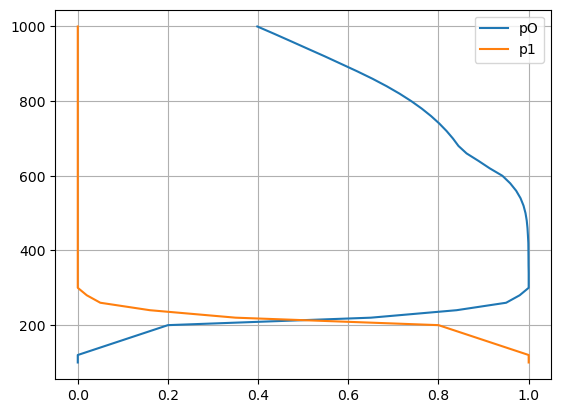

In [35]:
plt.plot(parelO.loc[time,:,-60,60],parelO.index.get_level_values('ht').unique(),label='pO')
plt.plot(parel1.loc[time,:,-60,60],parel1.index.get_level_values('ht').unique(),label='p1')
plt.legend()
plt.grid()

### Calculationg Gyrofrequency

In [37]:
gyrofreq = cond.gyrofrequency(dado.Dfgrid["B(T)"])
gyrofreq.result.index.names = ['ht','lat',"lon"] #renaming index levels

calculando as freqcol all: start 
Done


In [38]:
gyrofreq.result

we         wi1         wi2
ht    lat   lon                                        
100.0 -80.0 0.0    1.026896e+07  184.686988  352.066087
            20.0   1.005710e+07  180.876687  344.802566
            40.0   9.754655e+06  175.437217  334.433385
            60.0   9.388836e+06  168.857966  321.891455
            80.0   8.992655e+06  161.732656  308.308583
...                         ...         ...         ...
480.0  80.0 260.0  8.273699e+06  148.802251  283.659542
            280.0  8.341833e+06  150.027639  285.995481
            300.0  8.360026e+06  150.354847  286.619232
            320.0  8.336816e+06  149.937420  285.823498
            340.0  8.297310e+06  149.226893  284.469029

[6120 rows x 3 columns]

In [39]:
#juntamos num df pra facilitar os cálculos 

calcvaluesdf = gyrofreq.result.join(freqc.resul.copy(),
                          how = 'inner') #inner para ficarem só as coordenadas que ambos dataframes tem

# gyrfq.sort_values(["ht",'lat','lon'],inplace=True)
# gyrfq.set_index(["ht",'lat','lon'],inplace=True)
#gyrfq.dropna()

In [40]:
calcvaluesdf

we         wi1         wi2           fen  \
ht    lat   lon                                                         
100.0 -80.0 0.0    1.026896e+07  184.686988  352.066087  10492.177359   
            20.0   1.005710e+07  180.876687  344.802566  10358.355540   
            40.0   9.754655e+06  175.437217  334.433385  10283.489347   
            60.0   9.388836e+06  168.857966  321.891455  10260.412015   
            80.0   8.992655e+06  161.732656  308.308583  10264.158146   
...                         ...         ...         ...           ...   
480.0  80.0 260.0  8.273699e+06  148.802251  283.659542      0.000226   
            280.0  8.341833e+06  150.027639  285.995481      0.000210   
            300.0  8.360026e+06  150.354847  286.619232      0.000221   
            320.0  8.336816e+06  149.937420  285.823498      0.000212   
            340.0  8.297310e+06  149.226893  284.469029      0.000201   

                          fin1         fin2  
ht    lat   lon                              
100.0 -80.0 0.0    1153.247628  1829.892412  
            20.0   1141.931286  1811.903841  
            40.0   1130.313404  1793.509899  
            60.0   1119.370611  1776.234895  
            80.0   1110.524800  1762.290642  
...                        ...          ...  
480.0  80.0 260.0     0.000481     0.001511  
            280.0     0.000462     0.001442  
            300.0     0.000441     0.001381  
            320.0     0.000424     0.001335  
            340.0     0.000409     0.001295  

[6120 rows x 6 columns]

### Calculando as condutividades

In [42]:
conductivity = cond.condiono_adachi()

In [43]:
conductivity.calc_prelativa_all(iriteste.iridata.data["O+"].loc[time],
                        iriteste.iridata.data["NO+"].loc[time],
                        iriteste.iridata.data["O2+"].loc[time],
                        iriteste.iridata.data["Ne"].loc[time])

Calculating relative contribution parameters...
Done


(ht      lat    lon  
 100.0   -90.0  0.0      4.336414e-11
                5.0      4.336409e-11
                10.0     4.336403e-11
                15.0     4.336399e-11
                20.0     4.336393e-11
                             ...     
 1000.0   90.0  340.0    0.000000e+00
                345.0    0.000000e+00
                350.0    0.000000e+00
                355.0    0.000000e+00
                360.0    0.000000e+00
 Length: 124246, dtype: float32,
 ht      lat    lon  
 100.0   -90.0  0.0      0.000000e+00
                5.0      0.000000e+00
                10.0     0.000000e+00
                15.0     0.000000e+00
                20.0     0.000000e+00
                             ...     
 1000.0   90.0  340.0    9.146947e-12
                345.0    9.146947e-12
                350.0    9.146947e-12
                355.0    9.146956e-12
                360.0    9.146956e-12
 Length: 124246, dtype: float32)

In [44]:
#Alining Data by putting everything in a same Data Frame
conductivity.calcvaluesdf = gyrofreq.result.join(freqc.resul.copy(),
                          how = 'inner') #inner para ficarem só as coordenadas que ambos dataframes tem

#= Ordering multiindex
conductivity.calcvaluesdf 

we         wi1         wi2           fen  \
ht    lat   lon                                                         
100.0 -80.0 0.0    1.026896e+07  184.686988  352.066087  10492.177359   
            20.0   1.005710e+07  180.876687  344.802566  10358.355540   
            40.0   9.754655e+06  175.437217  334.433385  10283.489347   
            60.0   9.388836e+06  168.857966  321.891455  10260.412015   
            80.0   8.992655e+06  161.732656  308.308583  10264.158146   
...                         ...         ...         ...           ...   
480.0  80.0 260.0  8.273699e+06  148.802251  283.659542      0.000226   
            280.0  8.341833e+06  150.027639  285.995481      0.000210   
            300.0  8.360026e+06  150.354847  286.619232      0.000221   
            320.0  8.336816e+06  149.937420  285.823498      0.000212   
            340.0  8.297310e+06  149.226893  284.469029      0.000201   

                          fin1         fin2  
ht    lat   lon                              
100.0 -80.0 0.0    1153.247628  1829.892412  
            20.0   1141.931286  1811.903841  
            40.0   1130.313404  1793.509899  
            60.0   1119.370611  1776.234895  
            80.0   1110.524800  1762.290642  
...                        ...          ...  
480.0  80.0 260.0     0.000481     0.001511  
            280.0     0.000462     0.001442  
            300.0     0.000441     0.001381  
            320.0     0.000424     0.001335  
            340.0     0.000409     0.001295  

[6120 rows x 6 columns]

#### Hall

In [46]:
# Hall
conductivity.calc_Hall(conductivity.calcvaluesdf["fen"],
                       conductivity.calcvaluesdf["fin1"],
                       conductivity.calcvaluesdf["fin2"], 
                       conductivity.calcvaluesdf['wi1'],
                       conductivity.calcvaluesdf['wi2'],
                       conductivity.calcvaluesdf['we'],
                       conductivity.p1,
                       conductivity.p2,
                       iriteste.iridata.data['Ne'].loc[time],
                       dado.Dfgrid["B(T)"]).dropna()


== Calculando a Condutividade de Hall
Done


ht     lat    lon  
100.0  -80.0  0.0      0.000153
              20.0     0.000166
              40.0     0.000180
              60.0     0.000194
              80.0     0.000206
                         ...   
480.0   80.0  260.0    0.000252
              280.0    0.000254
              300.0    0.000241
              320.0    0.000216
              340.0    0.000191
Length: 6120, dtype: float64

In [47]:
conductivity.CondH.rename("Hall's conductivity [S/m]")

ht      lat    lon  
100.0   -90.0  0.0     NaN
               5.0     NaN
               10.0    NaN
               15.0    NaN
               20.0    NaN
                        ..
1000.0   90.0  340.0   NaN
               345.0   NaN
               350.0   NaN
               355.0   NaN
               360.0   NaN
Name: Hall's conductivity [S/m], Length: 124246, dtype: float64

In [48]:
testehall = calc_Hall(calcvaluesdf["fen"],
                       calcvaluesdf["fin1"],
                       calcvaluesdf["fin2"], 
                       calcvaluesdf['wi1'],
                       calcvaluesdf['wi2'],
                       calcvaluesdf['we'],
                       parelO.loc[time],
                       parel1.loc[time],
                       iriteste.iridata.data['Ne'].loc[time],
                       dado.Dfgrid["B(T)"]).dropna()
testehall


Calculando a Condutividade de Hall...
Done


ht     lat    lon  
100.0  -80.0  0.0      0.000148
              20.0     0.000161
              40.0     0.000174
              60.0     0.000188
              80.0     0.000200
                         ...   
480.0   80.0  260.0    0.000024
              280.0    0.000025
              300.0    0.000022
              320.0    0.000018
              340.0    0.000014
Length: 6120, dtype: float64

#### Pedersen

In [50]:
conductivity.calc_Pedersen(conductivity.calcvaluesdf["fen"],
                       conductivity.calcvaluesdf["fin1"],
                       conductivity.calcvaluesdf["fin2"], 
                       conductivity.calcvaluesdf['wi1'],
                       conductivity.calcvaluesdf['wi2'],
                       conductivity.calcvaluesdf['we'],
                       conductivity.p1,
                       conductivity.p2,
                       iriteste.iridata.data['Ne'].loc[time],
                       dado.Dfgrid["B(T)"]).dropna()
conductivity.CondP.rename("Pedersen's conductivity [S/m]")


== Calculando a condutividade de Pedersen
Done



ht      lat    lon  
100.0   -90.0  0.0     NaN
               5.0     NaN
               10.0    NaN
               15.0    NaN
               20.0    NaN
                        ..
1000.0   90.0  340.0   NaN
               345.0   NaN
               350.0   NaN
               355.0   NaN
               360.0   NaN
Name: Pedersen's conductivity [S/m], Length: 124246, dtype: float64

In [51]:
testepedersen = calc_Pedersen(calcvaluesdf["fen"],
                      calcvaluesdf["fin1"],
                      calcvaluesdf["fin2"], 
                      calcvaluesdf['wi1'],
                      calcvaluesdf['wi2'],
                      calcvaluesdf['we'],
                      parelO.loc[time],
                      parel1.loc[time],
                      iriteste.iridata.data['Ne'].loc[time],
                      dado.Dfgrid["B(T)"]).dropna()
testepedersen

===== Calculando a condutividade de Pedersen =====
Done


ht     lat    lon  
100.0  -80.0  0.0      0.186551
              20.0     0.184678
              40.0     0.181257
              60.0     0.176552
              80.0     0.170893
                         ...   
480.0   80.0  260.0    0.000003
              280.0    0.000003
              300.0    0.000003
              320.0    0.000003
              340.0    0.000003
Length: 6120, dtype: float64

## Plotando

In [53]:
h = 100 #height to plot data in km

testepedersen_plot = testepedersen.loc[h].reset_index() #voltando pro index normal pra latitude e longitude serem colunas
testehall_plot = testehall.loc[h].reset_index()
ne_plot = ne.loc[h].reset_index()

In [54]:
#testehall_plot, testehall.loc[100].reset_index()

Text(0.5, 1.0, 'Mapa da condutividade de Hall do ano de 2008 100km de altura')

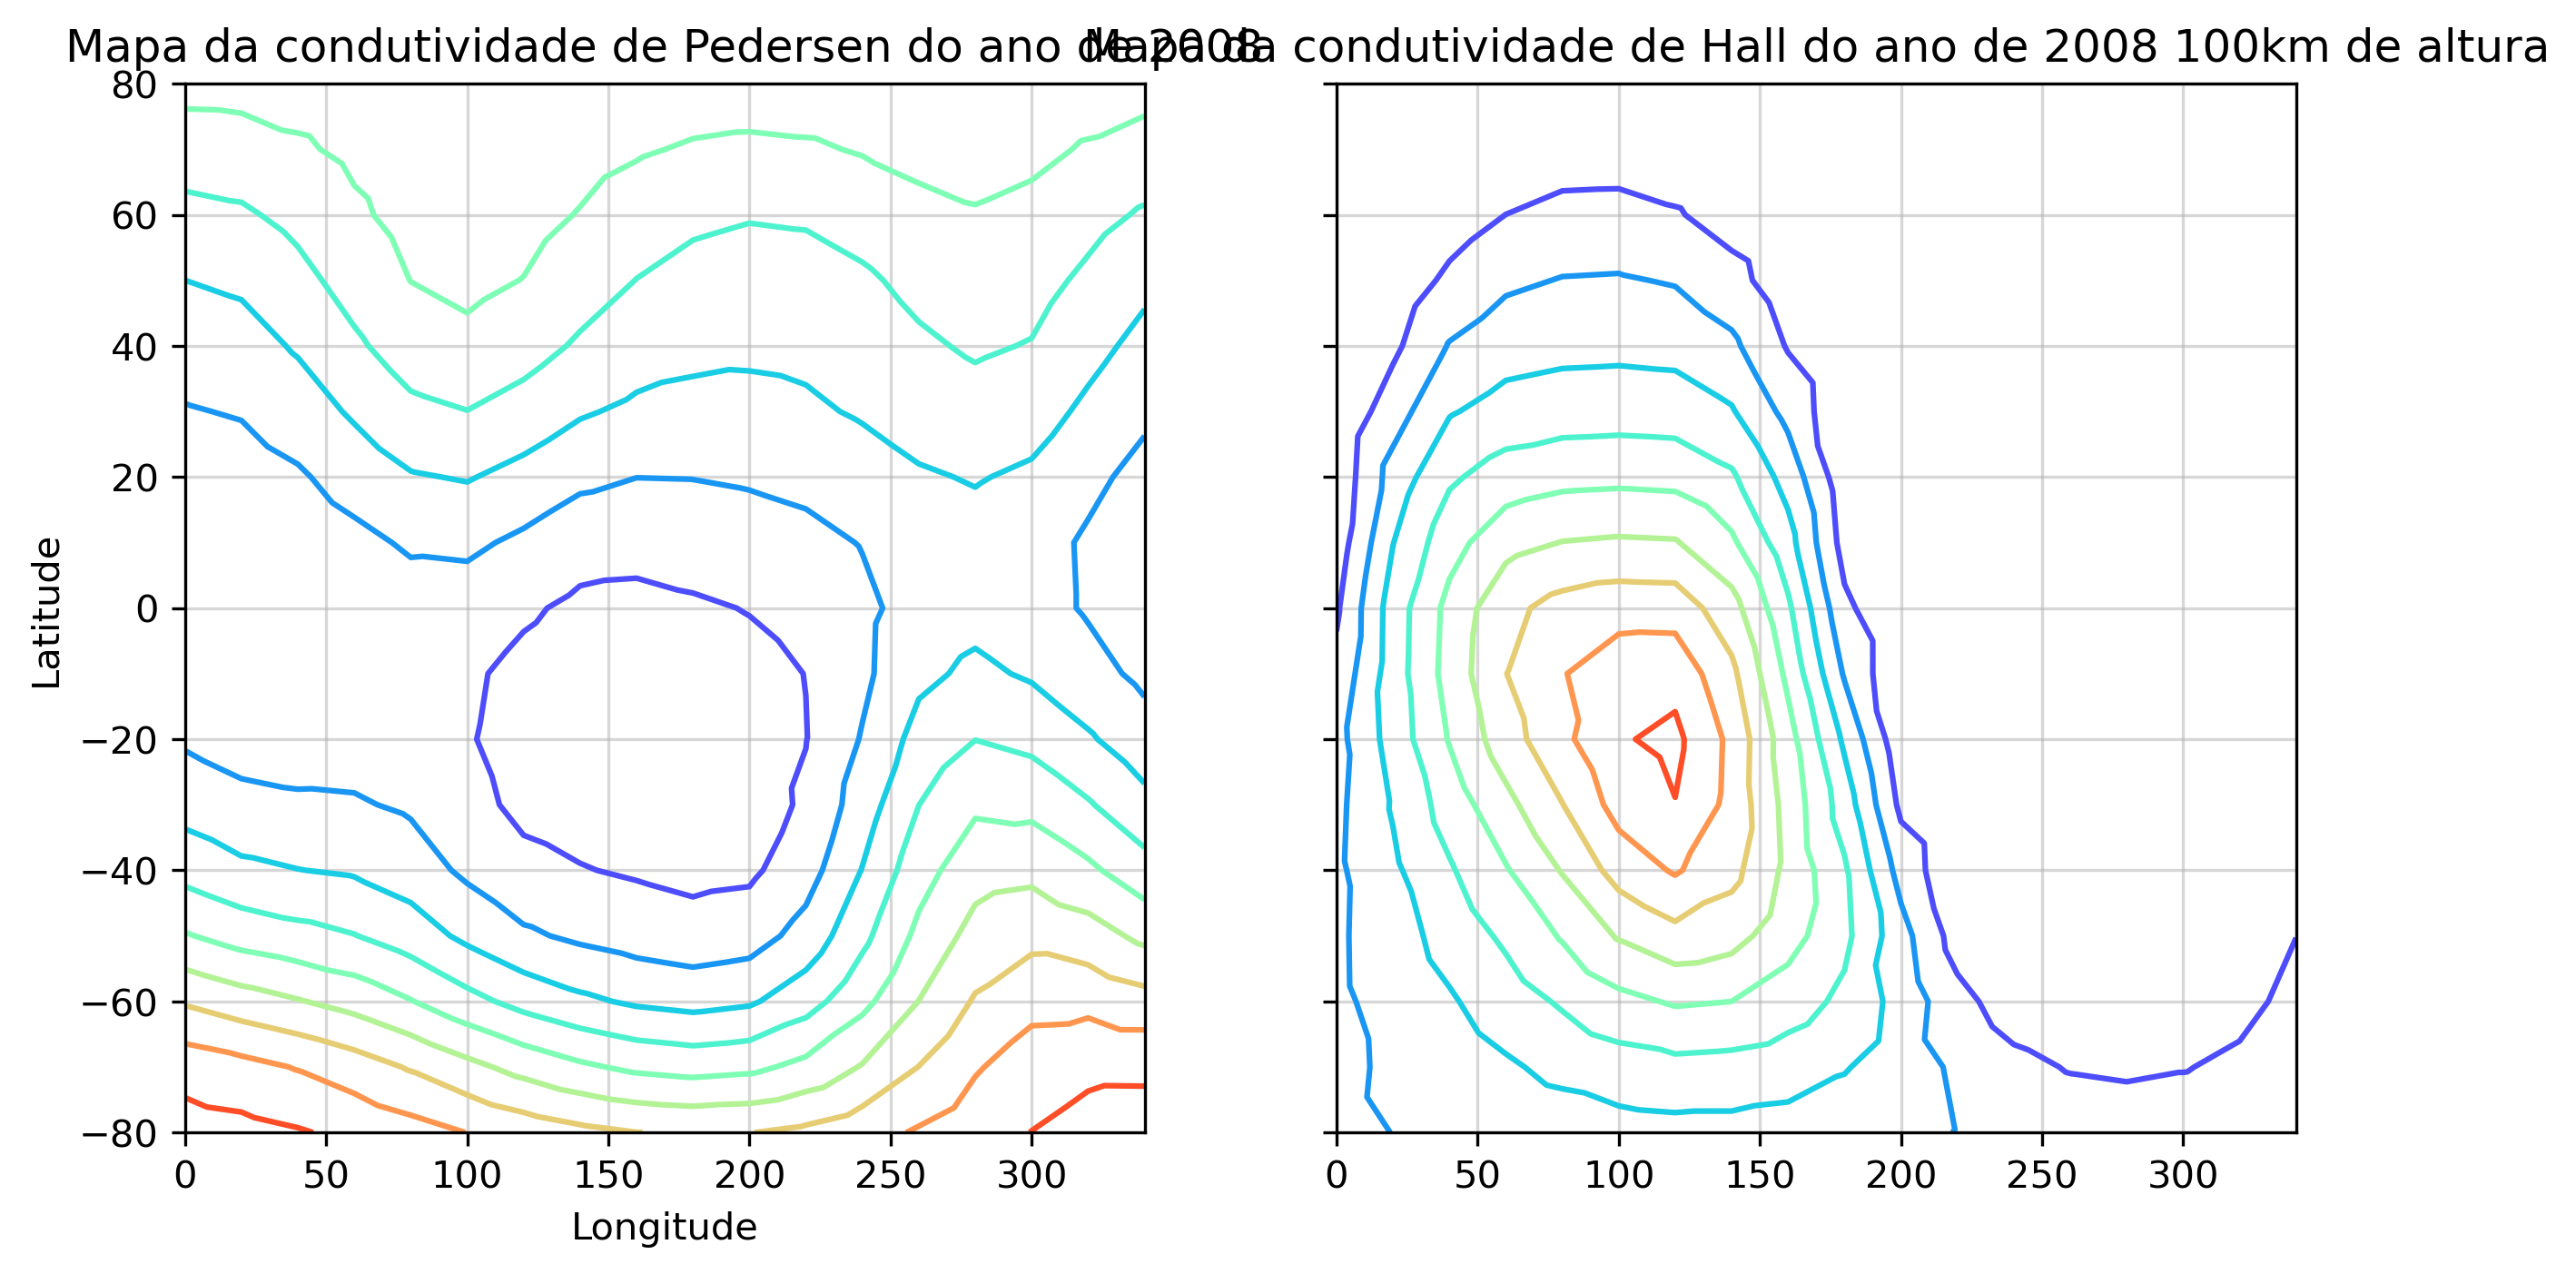

In [55]:
fig,ax = plt.subplots(1,2,figsize=(10,5),sharey=True,dpi=300)
ax[0].set_title("Mapa da condutividade de Pedersen do ano de 2008")
ax[0].set_ylabel("Latitude")
ax[0].set_xlabel("Longitude")
#ax[0].legend()
#fig.colorbar()
ax[0].grid(visible = True, alpha=0.5)
ax[0].tricontour(testepedersen_plot["lon"],testepedersen_plot["lat"],testepedersen_plot.loc[:,0],10,cmap='rainbow')

ax[1].tricontour(testehall_plot["lon"],testehall_plot["lat"],testehall_plot.loc[:,0],10,cmap='rainbow')
ax[1].grid(visible = True, alpha=0.5)
ax[1].set_title("Mapa da condutividade de Hall do ano de 2008 100km de altura")

#plt.tripcolor(testepedersen_plot["lon"],testepedersen_plot["lat"],testepedersen_plot.loc[:,0],cmap='rainbow')

### Grafico 2D

#### Criando meshgrid

In [58]:
X,Y = np.meshgrid(testehall_plot["lon"].unique()-180,testehall_plot["lat"].unique())
Xe,Ye = np.meshgrid( ne_plot['lon'].unique()-180, ne_plot['lat'].unique())

In [59]:
#X,Y,X[1,2]

In [60]:
#testehall_plot["lat"==20].to_numpy() #passing to numpy array format

#### Countour maps

#### prepplot_2dgrid

In [63]:
def prepplot_2dgrid(values,h,title=" "):
    values_plot = values.loc[h].reset_index() #leaving the multindex to use normal indexing
    
    X,Y = np.meshgrid(values_plot['lon'].unique() - 180,values_plot['lat'].unique())

    value2dformat = pd.DataFrame([])
    for i in values_plot['lon'].unique():
        value2dformat[i] = values.loc[h,:,i]
        #print('\n\n i',i,'\nvalues2dformat[i]\n',value2dformat[i],'\n\n values.loc[]',values.loc[h,:,i])
        
    return X,Y,value2dformat

In [64]:
def prepplot_valueto2Dgrid(values,h):
    value2dformat = pd.DataFrame([])
    values_plot = values.loc[h].reset_index() #leaving the multindex to use normal indexing
    
    for i in values_plot['lon'].unique():
        value2dformat[i] = values.loc[h,:,i]
        #print('\n\n i',i,'\nvalues2dformat[i]\n',value2dformat[i],'\n\n values.loc[]',values.loc[h,:,i])
    
    return value2dformat

def prepplot_creat2Dgrid(values,h):
    values_plot = values.loc[h].reset_index() #leaving the multindex to use normal indexing
    
    X,Y = np.meshgrid(values_plot['lon'].unique() - 180, values_plot['lat'].unique())
    
    return X,Y

In [65]:
eletricidade = pd.DataFrame([])
for i in testepedersen_plot["lon"].unique():
    #print("\nlon",i,'\n',testepedersen.loc[100,:,i])
    eletricidade[i] = testepedersen.loc[h,:,i]

eletricidade2 = pd.DataFrame([])
for i in testehall_plot["lon"].unique():
    #print("\nlat",i,testehall.loc[h,:,i])
    eletricidade2[i] = testehall.loc[h,:,i]

edensity = pd.DataFrame([])
for i in ne_plot['lon'].unique():
    edensity[i] = ne.loc[h,:,i]
#eletricidade2.set_axis(np.array([ 0.,  20.,  40.,  60.,  80., 100., 120., 140., 160.])-180, axis=1)
#colocando os valores de da eletricidade numa matriz 2D para poder plotar
#eletricidade.rename_axis("Longitude",axis=1)

In [66]:
fen = freqc.resul['fen'].dropna()
fen

ht     lat    lon  
100.0  -90.0  0.0      10179.179536
              20.0     10179.179536
              40.0     10179.179536
              60.0     10179.179536
              80.0     10179.179536
                           ...     
500.0   90.0  280.0        0.000075
              300.0        0.000075
              320.0        0.000075
              340.0        0.000075
              360.0        0.000075
Name: fen, Length: 14763, dtype: float64

#### plot_2dgrid

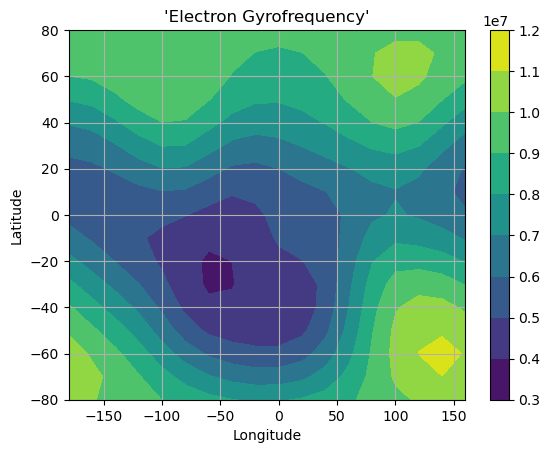

<module 'matplotlib.pyplot' from 'C:\\Users\\tedea\\Anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

In [68]:
def plot_2dgrid(values,h,title=" "):
    values_plot = values.loc[h].reset_index() #leaving the multindex to use normal indexing
    
    X,Y = np.meshgrid(values_plot['lon'].unique()-180,values_plot['lat'].unique())

    value2dformat = pd.DataFrame([])
    for i in values_plot['lon'].unique():
        value2dformat[i] = values.loc[h,:,i]
        
    plt.contourf(X,Y,value2dformat)
    plt.title(title)
    plt.xlabel("Longitude")
    plt.ylabel("Latitude")
    plt.grid()
    plt.colorbar()   
    
    plt.show()
    return plt
    
plot_2dgrid(calcvaluesdf['we'],h,"'Electron Gyrofrequency'")

In [69]:
#plot_2dgrid(freqc.resul['fin1'].dropna(),h,"'Electron Gyrofrequency'")

In [70]:
freqcres_plot = freqc.resul['fin1'].loc[h].reset_index()
fin = freqc.resul['fin1'].dropna().reset_index()
fin

ht   lat    lon          fin1
0        0.0 -90.0    0.0  6.566674e+09
1        0.0 -90.0   20.0  6.566674e+09
2        0.0 -90.0   40.0  6.566674e+09
3        0.0 -90.0   60.0  6.566674e+09
4        0.0 -90.0   80.0  6.566674e+09
...      ...   ...    ...           ...
70998  500.0  90.0  280.0  2.420769e-04
70999  500.0  90.0  300.0  2.420769e-04
71000  500.0  90.0  320.0  2.420769e-04
71001  500.0  90.0  340.0  2.420769e-04
71002  500.0  90.0  360.0  2.420769e-04

[71003 rows x 4 columns]

In [71]:
freqc.resul['fin1'].loc[h]

lat    lon  
-90.0  0.0      1105.479115
       5.0              NaN
       10.0             NaN
       15.0             NaN
       20.0     1105.479115
                   ...     
 90.0  340.0    1573.228074
       345.0            NaN
       350.0            NaN
       355.0            NaN
       360.0    1573.228074
Name: fin1, Length: 2701, dtype: float64

In [72]:
Xfen,Yfen = np.meshgrid(ne_plot['lon'].unique()-180, ne_plot['lat'].unique())

In [73]:
freqcres_plot = freqc.resul.loc[h].dropna().reset_index()

valuefen  = pd.DataFrame([])
for i in freqcres_plot['lon'].dropna().unique():
    #print("\nlon",i,'\n',testepedersen.loc[100,:,i])
    valuefen[i] = fen.loc[h,:,i]

In [74]:
#valuefen

In [75]:
#prepplot_2dgrid(calcvaluesdf['fen'],h,"'Ion 1 Gyrofrequency'")

In [76]:
# a,b,res = prepplot_2dgrid(calcvaluesdf['fen'],h,"'Ion 1 Gyrofrequency'")
# res

#### Gyrofrequency

In [78]:
#calcvaluesdf

In [79]:
import geopandas as gpd

In [80]:
countries = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))

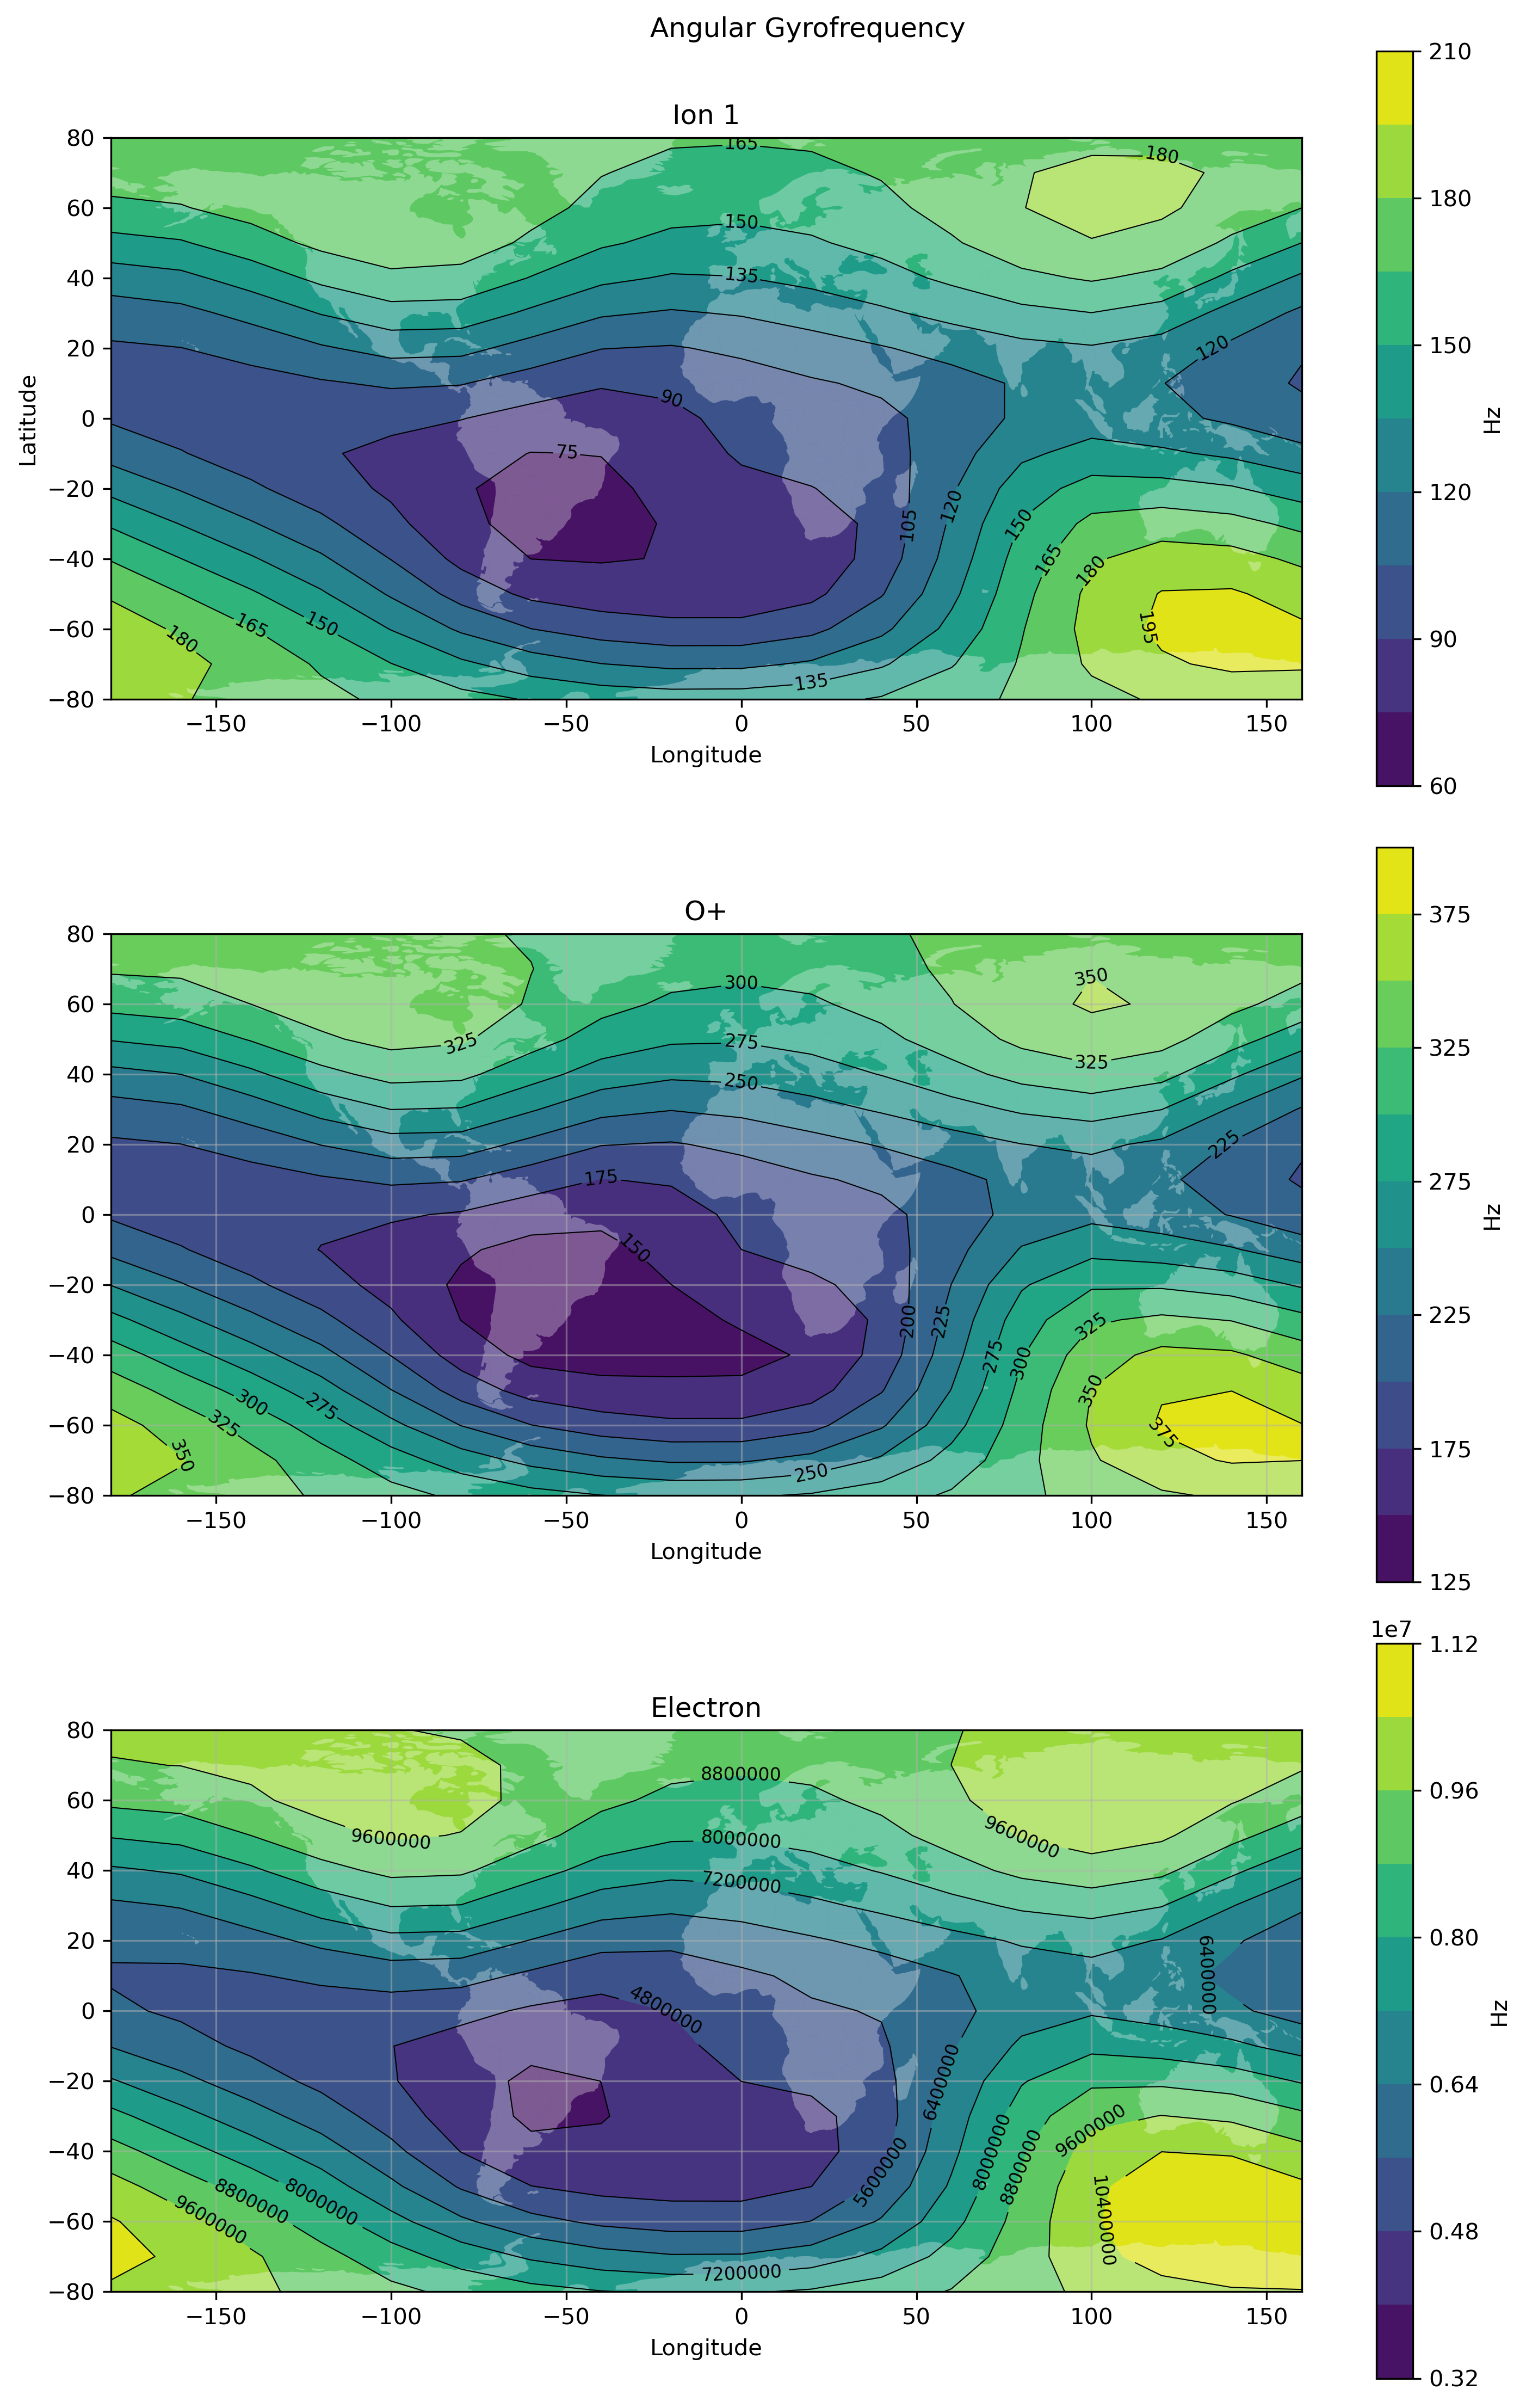

In [81]:
sizefig = (10,15)

fig,ax = plt.subplots(3,1,figsize = sizefig, dpi = 300,layout = 'tight')
fig.suptitle("Angular Gyrofrequency")
#fig.tight_layout()

Xi,Yi,values = prepplot_2dgrid(calcvaluesdf['wi1'],h,"'Ion 1'")

cntr1 = ax[0].contourf(Xi,Yi,values,levels=10)
contour1 = ax[0].contour(Xi,Yi,values,levels=10,colors='black', linewidths=0.5)
plt.clabel(contour1, inline = True, fontsize=8)

ax[0].set_title("Ion 1")
ax[0].set_xlabel("Longitude")
ax[0].set_ylabel("Latitude")
cbar1 = fig.colorbar(cntr1, ax = ax[0], label = "Hz")
#ax[0].grid(visible = True, alpha=0.5)
countries.plot(ax = ax[0], color = "white",figsize=sizefig, alpha=0.3)
#countries.exterior.plot(ax = ax[0], color = "gray",figsize=sizefig, alpha=0.3,linewidths=0.3)
#countries.head()
ax[0].set_xlim([-180, 160])
ax[0].set_ylim([-80, 80])


X2,Y2,values2 = prepplot_2dgrid(calcvaluesdf['wi2'], h,"'O+'")

cntr2 = ax[1].contourf(X2, Y2, values2, levels = 10)
contour2 = ax[1].contour(X2, Y2, values2, levels = 10,colors='black', linewidths=0.5)
cbar2 = fig.colorbar(cntr2,ax=ax[1],label="Hz")

ax[1].clabel(contour2, inline = True, fontsize=8)
#countries["geometry"].boundary.plot(ax = ax[1], color = "yellow",figsize=sizefig, linewidths=0.3)
countries.plot(ax = ax[1], color = "white",figsize=sizefig, alpha=0.3)

ax[1].set_xlim([-180, 160])
ax[1].set_ylim([-80, 80])
ax[1].set_title('O+')
ax[1].set_xlabel("Longitude")
ax[1].grid(visible = True, alpha=0.5)


X3,Y3,values3 = prepplot_2dgrid(calcvaluesdf['we'],h,"'Electron'")

cntr3 = ax[2].contourf(X3,Y3,values3,levels = 10)
contour3 = ax[2].contour(X3,Y3,values3,levels=10,colors='black', linewidths=0.5)
cbar3 = fig.colorbar(cntr3,ax=ax[2],label="Hz")

#countries["geometry"].boundary.plot(ax = ax[2], color = "white",figsize=sizefig)
countries.plot(ax = ax[2], color = "white",figsize=sizefig, alpha=0.3)
plt.clabel(contour3, inline = True, fontsize=8)

ax[2].set_xlim([-180, 160])
ax[2].set_ylim([-80, 80])
ax[2].set_title('Electron')
ax[2].set_xlabel("Longitude")
ax[2].grid(visible = True, alpha=0.5)

#countries.head()

#fig.savefig("plot_Angular Gyrofrequency" + name_saida + '.png', dpi = 300, transparent=True)

#ax[1][0] = prepplot_2dgrid(calcvaluesdf['fen'],h,"Electron colission frequency")
#ax[1][1] = prepplot_2dgrid(calcvaluesdf['fin1'],h,"Ion1 colission frequency")
#plot_2dgrid(calcvaluesdf['fin2'],h,"Ion O colission frequency")

#### Collision Frequency

fig,ax = plt.subplots(3,1,figsize = (10,18),dpi=300)
fig.tight_layout()
#fig.
X,Y = prepplot_creat2Dgrid(freqc.resul.dropna(),h)



#Xi,Yi,valfin1 = prepplot_2dgrid(freqc.resul['fin1'].dropna(),h,"'Ion 1 Gyrofrequency'")

valfin1 = prepplot_valueto2Dgrid(freqc.resul['fin1'].dropna(),h)
cntr1 = ax[0].contourf(X,Y,valfin1)
contour0 = ax[0].contour(X,Y,valfin1,colors='black', linewidths=0.5)

plt.clabel(contour0, inline = True, fontsize = 8)
ax[0].set_title("Ion 1 - neutrals Colision frequency")

ax[0].set_xlim([-180, 160])
ax[0].set_ylim([-80, 80])
ax[0].axis('equal')
ax[0].grid(visible = True, alpha = 0.5)
#ax[0].set_xlabel("Longitude")
ax[0].set_ylabel("Latitude")
cbar1 = fig.colorbar(cntr1,ax = ax[0])
cbar1.set_label("Hz")


X2,Y2,valfin2 = prepplot_2dgrid(freqc.resul['fin2'].dropna(),h,"'Ion O Gyrofrequency'")

cntr2 = ax[1].contourf(X2,Y2,valfin2)
contour1 = ax[1].contour(X2,Y2,valfin2,colors='black', linewidths=0.5)

plt.clabel(contour1, inline=True, fontsize=8)
cbar2 = fig.colorbar(cntr2, ax = ax[1])
cbar2.set_label("Hz")
ax[1].grid(visible = True, alpha=0.5)
ax[1].set_title('Ion O Colision frequency')
ax[1].set_ylabel("Latitude")
#ax[1].set_xlabel("Longitude")


X2,Y2,valfen = prepplot_2dgrid(freqc.resul['fen'].dropna(),h)
cntr3 = ax[2].contourf(X2, Y2, valfen)
contour2 = ax[2].contour(X2, Y2, valfen, colors = 'black', linewidths = 0.5)

plt.clabel(contour2, inline = True, fontsize = 8)
cbar3 = fig.colorbar(cntr3, ax = ax[2])
ax[2].grid(visible = True, alpha = 0.5)
ax[2].set_title('Electron Colision frequency')
ax[2].set_xlabel("Longitude")
ax[2].set_ylabel("Latitude")
cbar3.set_label("Hz")

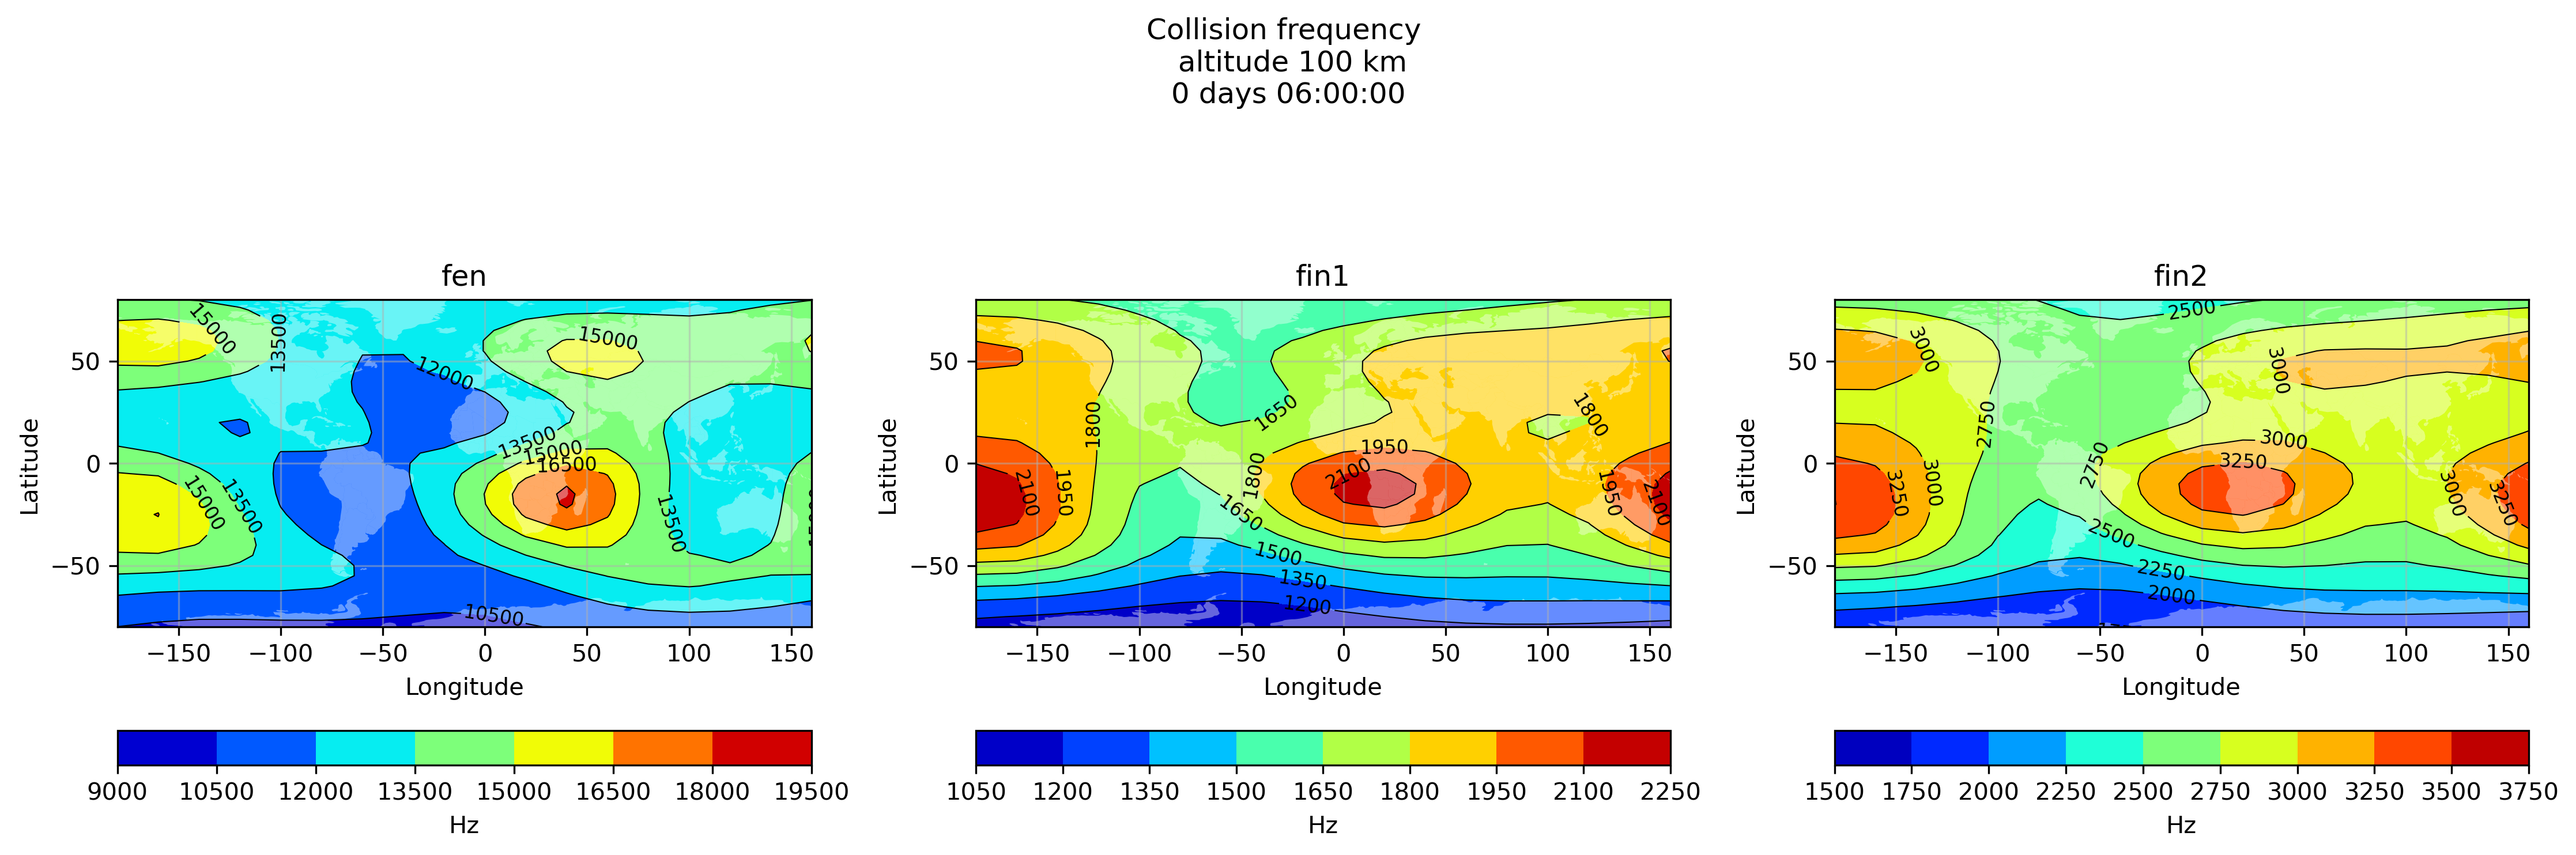

In [84]:
countries = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))

fig,ax = plt.subplots(1,3,figsize = (15,5),dpi=300,layout = 'tight' )
fig.suptitle("Collision frequency \n altitude " + str(h) + ' km\n' 
             + str(time))

columns = freqc.resul.columns.to_list()
titles = ['Electron Colision frequency',
    "Ion 1 - neutrals Colision frequency",
          'Ion O+ Colision frequency']

for i in range(3):

    X,Y = prepplot_creat2Dgrid(freqc.resul[columns[i]].dropna(),h)
    valfreq = prepplot_valueto2Dgrid(freqc.resul[columns[i]].dropna(),h)
    
    cntr = ax[i].contourf(X,Y,valfreq,cmap='jet')
    contour = ax[i].contour(X,Y,valfreq,colors='black', linewidths=0.5)

    countries.plot(ax = ax[i], color = "white",figsize=sizefig, alpha = 0.4)
    plt.clabel(contour, inline = True, fontsize = 8)
    
    ax[i].set_title(columns[i])
    ax[i].set_xlim([-180, 160])
    ax[i].set_ylim([-80, 80])
    #ax[i].axis('equal')
    ax[i].grid(visible = True, alpha = 0.5)
    ax[i].set_xlabel("Longitude")
    ax[i].set_ylabel("Latitude")
    cbar = fig.colorbar(cntr,ax = ax[i],location = 'bottom')
    cbar.set_label("Hz")



# X2,Y2,valfin2 = prepplot_2dgrid(freqc.resul['fin2'].dropna(),h,"'Ion O Gyrofrequency'")

# cntr2 = ax[1].contourf(X2,Y2,valfin2)
# contour1 = ax[1].contour(X2,Y2,valfin2,colors='black', linewidths=0.5)

# plt.clabel(contour1, inline=True, fontsize=8)
# cbar2 = fig.colorbar(cntr2, ax = ax[1])
# cbar2.set_label("Hz")
# ax[1].grid(visible = True, alpha=0.5)
# ax[1].set_title()
# ax[1].set_ylabel("Latitude")
# #ax[1].set_xlabel("Longitude")


# X2,Y2,valfen = prepplot_2dgrid(freqc.resul['fen'].dropna(),h)
# cntr3 = ax[2].contourf(X2, Y2, valfen)
# contour2 = ax[2].contour(X2, Y2, valfen, colors = 'black', linewidths = 0.5)

# plt.clabel(contour2, inline = True, fontsize = 8)
# cbar3 = fig.colorbar(cntr3, ax = ax[2])
# ax[2].grid(visible = True, alpha = 0.5)
# ax[2].set_title('')
# ax[2].set_xlabel("Longitude")
# ax[2].set_ylabel("Latitude")
# cbar3.set_label("Hz")

In [85]:
freqc.resul.columns.to_list()

['fen', 'fin1', 'fin2']

In [86]:
#Xi,Yi,valfin1 = prepplot_2dgrid(calcvaluesdf['fin1'],h,"'Ion 1 Gyrofrequency'")

In [87]:
calcvaluesdf['wi1']

ht     lat    lon  
100.0  -80.0  0.0      184.686988
              20.0     180.876687
              40.0     175.437217
              60.0     168.857966
              80.0     161.732656
                          ...    
480.0   80.0  260.0    148.802251
              280.0    150.027639
              300.0    150.354847
              320.0    149.937420
              340.0    149.226893
Name: wi1, Length: 6120, dtype: float64

#### densidade de elétrons

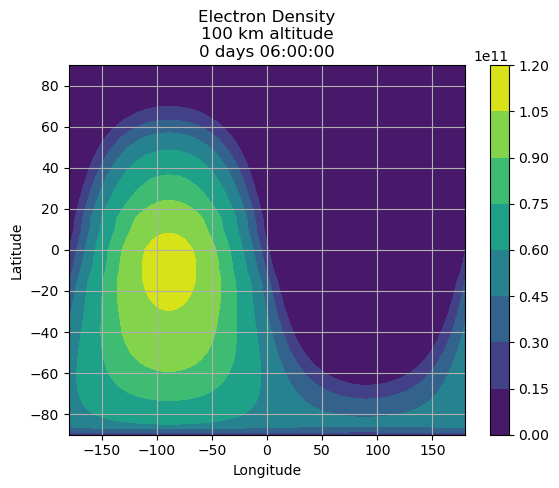

<module 'matplotlib.pyplot' from 'C:\\Users\\tedea\\Anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

In [89]:
plot_2dgrid(iriteste.iridata.data["Ne"].loc[time],h,"Electron Density\n"+str(h)+" km altitude\n" + time)

X,Y,values3 = prepplot_2dgrid(calcvaluesdf['we'],h,"'Electron Gyrofrequency'")
ax[1].contourf(X,Y,values3)

#### Densidade de elétrons

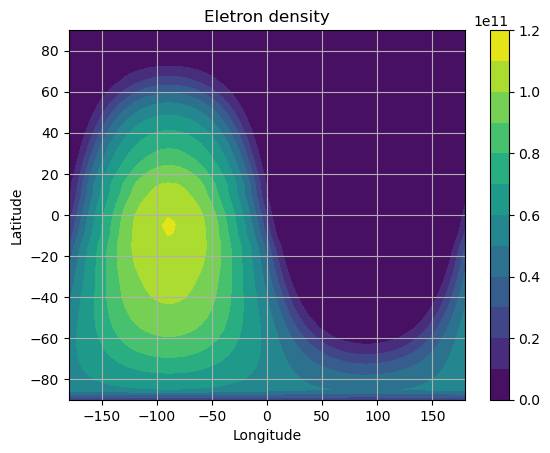

In [92]:
plt.contourf(Xe,Ye,edensity,levels=10)
plt.title('Eletron density')
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.grid()
plt.colorbar()

#### Imagens da condutividade

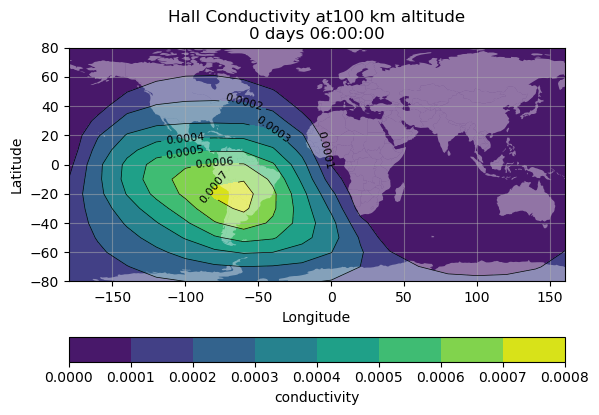

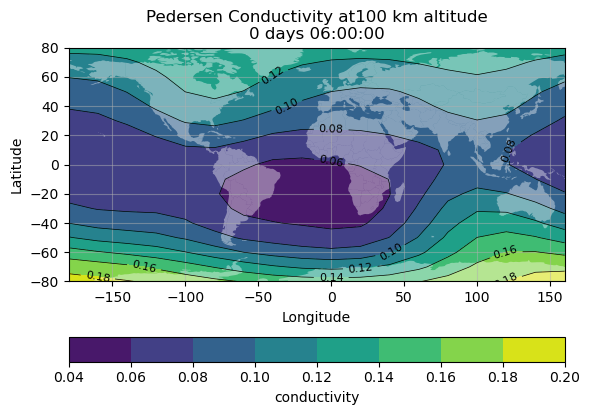

In [94]:
def plot_2dgrid(values,h,title=" "):
    values_plot = values.loc[h].reset_index() #leaving the multindex to use normal indexing
    countries = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))

    X,Y = np.meshgrid(values_plot['lon'].unique() - 180,values_plot['lat'].unique())

    value2dformat = pd.DataFrame([])
    for i in values_plot['lon'].unique():
        value2dformat[i] = values.loc[h,:,i]

    fig, ax = plt.subplots()
    cntr = ax.contourf(X,Y,value2dformat)
    contour = ax.contour(X,Y,value2dformat,colors='black', linewidths=0.5)
    ax.clabel(contour, inline = True, fontsize = 8)

    countries.plot(ax=ax,color = "white",figsize=sizefig, alpha = 0.4)
    
    ax.set_title(title)
    ax.set_xlabel("Longitude")
    ax.set_ylabel("Latitude")
    ax.set_xlim([-180, 160])
    ax.set_ylim([-80,80])
    ax.grid(visible = True, alpha = 0.5)
    
    fig.colorbar(cntr, ax=ax, label='conductivity',location = 'bottom')

plot_2dgrid(testehall.dropna(),h,'Hall Conductivity at'+ str(h) + " km altitude\n" +time)
plot_2dgrid(testepedersen.dropna(),h,'Pedersen Conductivity at'+str(h)+" km altitude\n"+time)


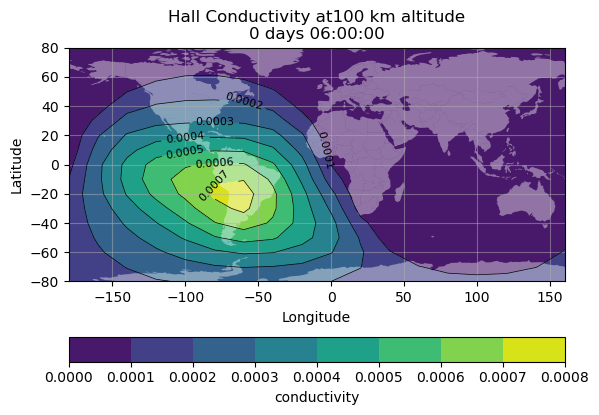

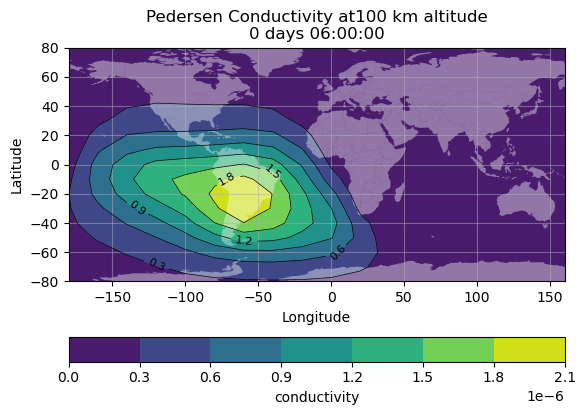

In [95]:
plot_2dgrid(conductivity.CondH.dropna(),h,'Hall Conductivity at'+ str(h) + " km altitude\n" +time)
plot_2dgrid(conductivity.CondP.dropna(),h,'Pedersen Conductivity at'+str(h)+" km altitude\n"+time)


In [96]:
testehall

ht     lat    lon  
100.0  -80.0  0.0      0.000148
              20.0     0.000161
              40.0     0.000174
              60.0     0.000188
              80.0     0.000200
                         ...   
480.0   80.0  260.0    0.000024
              280.0    0.000025
              300.0    0.000022
              320.0    0.000018
              340.0    0.000014
Length: 6120, dtype: float64

plt.contourf(X,Y,eletricidade2)
plt.title('Hall Conductivity ' + str(h) + ' km')
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.grid()
plt.colorbar()

fig,ax =  plt.subplots(1,2,figsize=(13,5),sharey=True,dpi=300)
#fig.title("ano 2008" + str(h) + " km de altura")

ax[0].set_title("Condutividade de Hall\n do ano de 2008 \na "+str(h)+" km de altitude \n"+str(time))
ax[0].set_ylabel("Latitude")
ax[0].set_xlabel("Longitude")
#ax[0].legend()
ax[0].grid(visible = True, alpha=0.5)
cntr = ax[0].contourf(X,Y,eletricidade2)
cbar1 = fig.colorbar(cntr,ax=ax[0])

ax[1].set_title("Condutividade de Pedersen\n do ano de 2008 \na "+str(h)+" km de altitude \n"+str(time))
cntr2 = ax[1].contourf(X,Y,eletricidade)
ax[1].grid(visible = True, alpha=0.5)
ax[1].set_xlabel("Longitude")

cbar2 = fig.colorbar(cntr2,ax=ax[1])

### Perfis

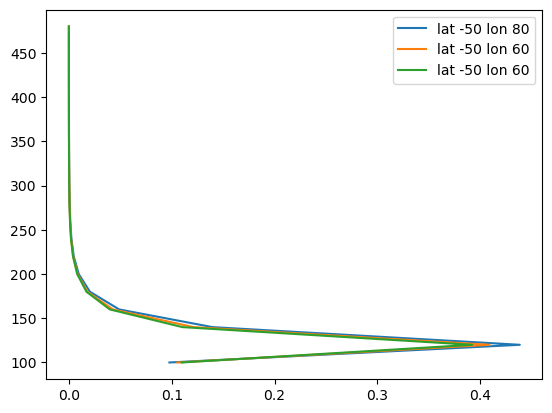

In [100]:
#plotando perfis 
plt.plot(testepedersen.loc[:,-50,80],testehall.index.get_level_values('ht').unique(),label='lat -50 lon 80')
plt.plot(testepedersen.loc[:,-50,60],testehall.index.get_level_values('ht').unique(),label='lat -50 lon 60')
plt.plot(testepedersen.loc[:,-50,40],testehall.index.get_level_values('ht').unique(),label='lat -50 lon 60')

plt.legend()

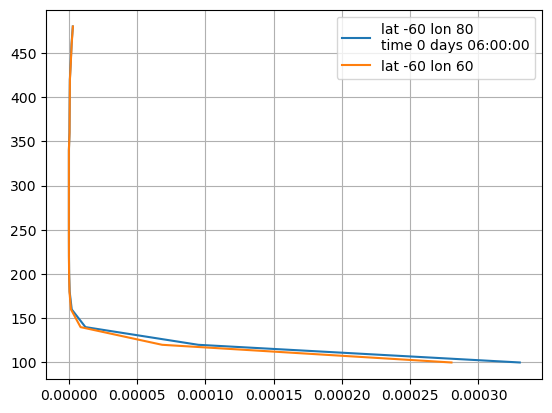

In [101]:
plt.plot(testehall.loc[:,-60,80],testehall.index.get_level_values('ht').unique(),label = 'lat -60 lon 80 \ntime ' + str(time))
plt.plot(testehall.loc[:,-60,60],testehall.index.get_level_values('ht').unique(),label = 'lat -60 lon 60')
#plt.plot(testehall.loc[:,-50,40],testehall.index.get_level_values('ht').unique(),label='lat -50 lon 40')
#plt.plot(testehall.loc[:,-50,100],testehall.index.get_level_values('ht').unique(),label='lat -50 lon 100')

#plt.plot(testehall.loc[:,-40,60],testehall.index.get_level_values('ht').unique(),label='lat -40 lon 60')
#plt.plot(testehall.loc[:,-40,80],testehall.index.get_level_values('ht').unique(),label='lat -40 lon 80')
plt.grid()
plt.legend()

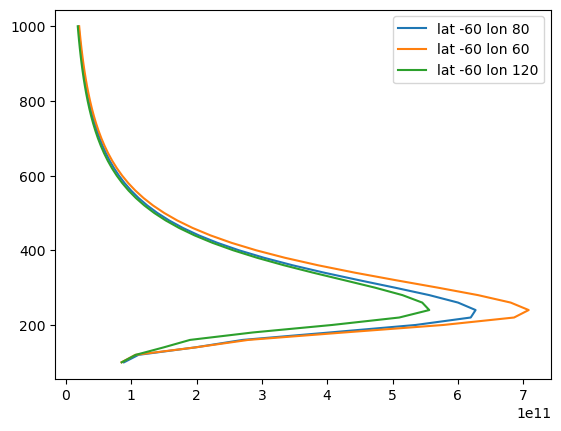

In [102]:
plt.plot(ne.loc[:,-60,80],ne.index.get_level_values('ht').unique(),label='lat -60 lon 80')
plt.plot(ne.loc[:,-60,60],ne.index.get_level_values('ht').unique(),label='lat -60 lon 60')
plt.plot(ne.loc[:,-60,120],ne.index.get_level_values('ht').unique(),label='lat -60 lon 120')
plt.legend()

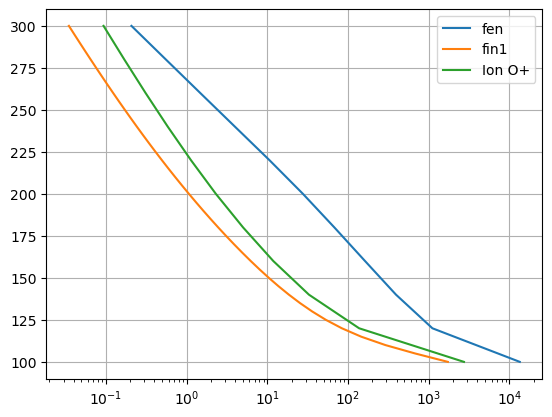

In [103]:
plt.semilogx(freqc.resul['fen'].dropna().loc[:300,60,80],
         freqc.resul['fen'].dropna().loc[:300,80,80].index.get_level_values('ht').unique(),
        label = "fen")

plt.semilogx(freqc.resul['fin1'].dropna().loc[100:300,60,80],
         freqc.resul['fin1'].dropna().loc[100:300,60,80].index.get_level_values('ht').unique(),
        label = "fin1")
plt.semilogx(freqc.resul['fin2'].dropna().loc[:300,60,80],
         freqc.resul['fin2'].dropna().loc[:300,60,80].index.get_level_values('ht').unique(),
        label = "Ion O+")
plt.legend()
plt.grid()

In [104]:
len(freqc.resul['fin1'].dropna().loc[:300,60,80])

61

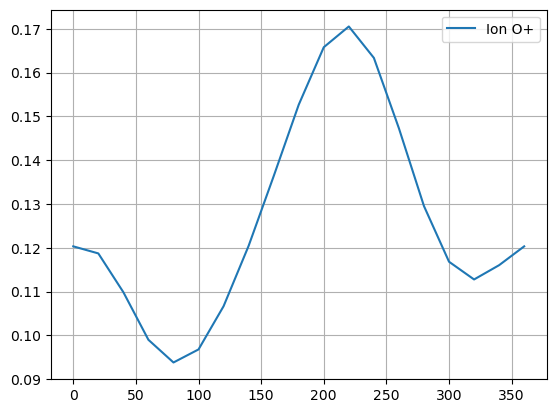

In [105]:
plt.plot(freqc.resul['fin2'].dropna().loc[300,60,:].index.get_level_values('lon').unique(),
    freqc.resul['fin2'].dropna().loc[300,60,:],         
        label = "Ion O+")
plt.legend()
plt.grid()

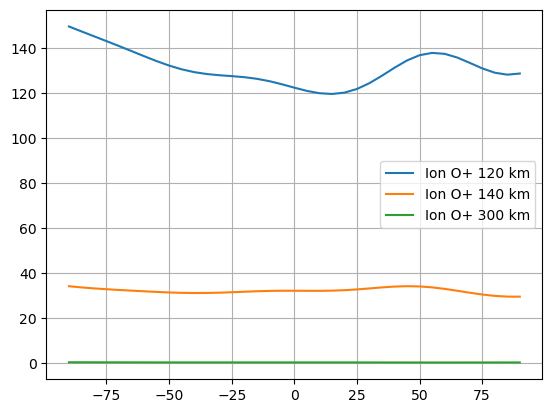

In [106]:
plt.plot(freqc.resul['fin2'].dropna().loc[120,:,80].index.get_level_values('lat').unique(),
    freqc.resul['fin2'].dropna().loc[120,:,80],         
        label = "Ion O+ 120 km")
plt.plot(freqc.resul['fin2'].dropna().loc[140,:,80].index.get_level_values('lat').unique(),
    freqc.resul['fin2'].dropna().loc[140,:,80],         
        label = "Ion O+ 140 km")
plt.plot(freqc.resul['fin2'].dropna().loc[300,:,80].index.get_level_values('lat').unique(),
    freqc.resul['fin2'].dropna().loc[300,:,80],         
        label = "Ion O+ 300 km")
plt.legend()
plt.grid()

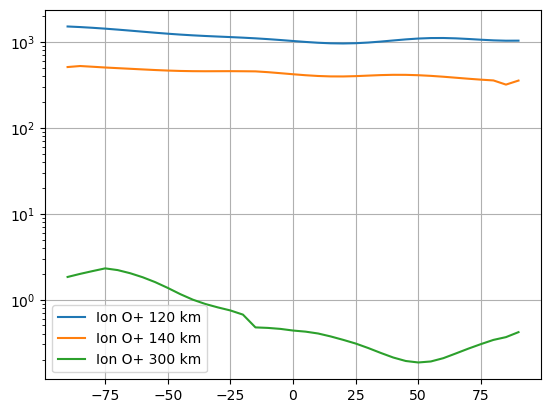

In [107]:
plt.semilogy(freqc.resul['fen'].dropna().loc[120,:,80].index.get_level_values('lat').unique(),
    freqc.resul['fen'].dropna().loc[120,:,80],         
        label = "Ion O+ 120 km")
plt.plot(freqc.resul['fen'].dropna().loc[140,:,80].index.get_level_values('lat').unique(),
    freqc.resul['fen'].dropna().loc[140,:,80],         
        label = "Ion O+ 140 km")
plt.plot(freqc.resul['fen'].dropna().loc[300,:,80].index.get_level_values('lat').unique(),
    freqc.resul['fen'].dropna().loc[300,:,80],         
        label = "Ion O+ 300 km")
plt.legend()
plt.grid()

In [108]:
cond.save_to_csv(conductivity.CondH, "Hall_"+str(time))

AttributeError: module 'conductivity0_9_5' has no attribute 'save_to_csv'

In [123]:
conductivity.CondH.dropna().to_csv("CondH_6h" + ".csv",sep=",",header=True)

In [125]:
conductivity.CondP.dropna().to_csv("CondP_6h" + ".csv",sep=",",header=True)